In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [13]:
batch_size=64
test_batch_size=1000
train_data=datasets.MNIST('./data', train=True, download=True, transform=transforms.ToTensor())
test_data=datasets.MNIST('./data', train=False, download=True, transform=transforms.ToTensor())
train_loader=torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader=torch.utils.data.DataLoader(test_data, batch_size=test_batch_size)

In [14]:
print(len(train_loader.dataset))
print(len(test_loader.dataset))

60000
10000


torch.Size([1, 28, 28])
5


<function matplotlib.pyplot.show(close=None, block=None)>

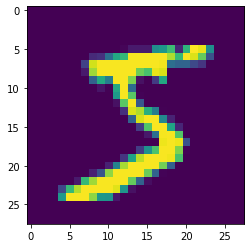

In [15]:
print(train_loader.dataset[0][0].shape)
print(train_loader.dataset[0][1])
plt.imshow(train_loader.dataset[0][0][0])
plt.show

In [18]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1=nn.Linear(784, 256)
        self.fc2=nn.Linear(256, 64)
        self.fc3=nn.Linear(64, 10)  #10인 이유는 0~9까지의 라벨을 예측하려고 하기 때문
    def forward(self,x):
        x=x.view(-1,784)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [22]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=Net().to(device)
lr=0.01
optimizer=optim.SGD(model.parameters(), lr=lr)
loss_func=nn.CrossEntropyLoss()

In [23]:
epochs=10
for epoch in range(1, epochs+1):
    model.train()
    train_loss=0
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target=data.to(device), target.to(device)
        optimizer.zero_grad()
        output=model(data)                  #트레이닝 데이터를 모델에 입력하여 계산
        loss=loss_func(output, target)
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()
        pred=output.argmax(dim=1)
        correct+=sum(pred==target).item()
    train_loss/=len(train_loader.dataset)
    print('Train Epoch {} \tLoss: {:.6f} \tAccuracy: {}/{} ({:.0f}%)'.format(epoch, train_loss, correct, len(train_loader.dataset),100*correct/len(train_loader.dataset)))
    

Train Epoch 1 	Loss: 0.025864 	Accuracy: 35077/60000 (58%)
Train Epoch 2 	Loss: 0.008399 	Accuracy: 51422/60000 (86%)
Train Epoch 3 	Loss: 0.006159 	Accuracy: 53322/60000 (89%)
Train Epoch 4 	Loss: 0.005411 	Accuracy: 54131/60000 (90%)
Train Epoch 5 	Loss: 0.004940 	Accuracy: 54611/60000 (91%)
Train Epoch 6 	Loss: 0.004572 	Accuracy: 54983/60000 (92%)
Train Epoch 7 	Loss: 0.004256 	Accuracy: 55332/60000 (92%)
Train Epoch 8 	Loss: 0.003983 	Accuracy: 55608/60000 (93%)
Train Epoch 9 	Loss: 0.003737 	Accuracy: 55915/60000 (93%)
Train Epoch 10 	Loss: 0.003509 	Accuracy: 56156/60000 (94%)


In [25]:
model.eval()
test_loss=0
correct=0
with torch.no_grad():
    for data,target in test_loader:
        data,target=data.to(device), target.to(device)
        output=model(data)
        test_loss+=loss_func(output, target).item()
        pred=output.argmax(dim=1)
        correct+=pred.eq(target).sum().item()
test_loss/=len(test_loader.dataset)
print("Test set: Average loss:{:.4f}, Accuracy:{}/{} ({:.0f}%)\n".format(test_loss, correct,len(test_loader.dataset), 100.*correct/len(test_loader.dataset)))

Test set: Average loss:0.0002, Accuracy:9389/10000 (94%)

